<a href="https://colab.research.google.com/github/Lostkyd/Human-Emotion-Classification/blob/main/Human_Emotion_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [29]:
import tensorflow as tf
import os
import random

import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,Activation,BatchNormalization

from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [15]:
EPOCHS = 500
images = (224,224)
BATCHS  = 32

In [5]:
test_path = '/content/drive/MyDrive/HEC/data/test'
train_path = '/content/drive/MyDrive/HEC/data/train'
val_path = '/content/drive/MyDrive/HEC/data/val'


train_gen = ImageDataGenerator(   rescale=1.0/255,
                                  zoom_range=0.2,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  brightness_range=[0.8, 1.2],
                                  shear_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')


val_augmented_images = train_gen.flow_from_directory(val_path,
                                                     target_size=images,
                                                     batch_size=32,
                                                     shuffle = True,
                                                     class_mode='categorical')

train_augmented_images = train_gen.flow_from_directory(train_path,
                                                       target_size=images,
                                                       batch_size=32,
                                                       shuffle = True,
                                                       class_mode='categorical')
test_gen = ImageDataGenerator(rescale=1.0/255)
test_images = test_gen.flow_from_directory(test_path,
                                           target_size=images,
                                           batch_size=32,
                                           shuffle = True,
                                           class_mode='categorical')

Found 70 images belonging to 7 classes.
Found 280 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
labels = {value: key for key, value in train_augmented_images.class_indices.items()}

for key, value in labels.items():
    print(f"{key} : {value}")


0 : angry
1 : disgust
2 : fear
3 : happy
4 : neutral
5 : sad
6 : surprise


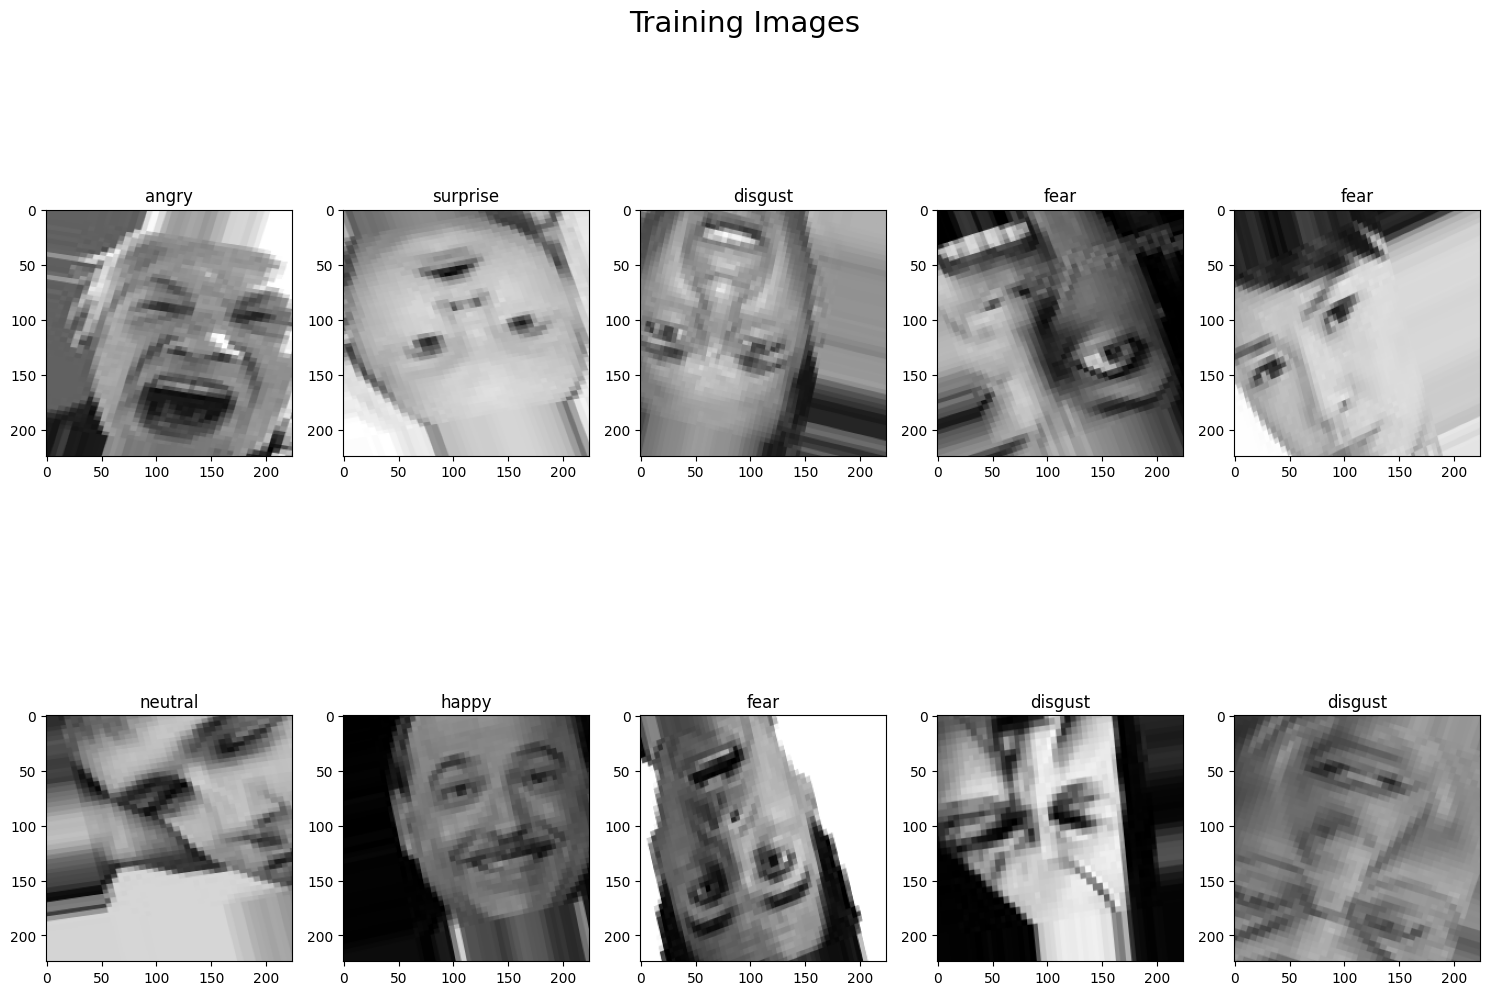

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 10

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_augmented_images[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_augmented_images[0][0][idx][:, :, :])
        idx += 1

plt.tight_layout()
plt.suptitle("Training Images", fontsize=21)
plt.show()

In [8]:
pre_trained_model = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [9]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [16]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
model = Sequential()
model.add(pre_trained_model)
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation = 'softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_1 (Dropout)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               6422784   
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 21,205,063
Trainable params: 6,490,375
N

In [19]:
 model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
print("Start Training")
history = model.fit(train_augmented_images,
          validation_data = val_augmented_images,
          epochs=EPOCHS,
          batch_size = BATCHS)
print("Done training")

Start Training
Epoch 1/500
9/9 [==============================] - 79s 8s/step - loss: 2.0637 - accuracy: 0.1107 - val_loss: 1.9926 - val_accuracy: 0.0857
Epoch 2/500
9/9 [==============================] - 7s 778ms/step - loss: 1.9860 - accuracy: 0.1821 - val_loss: 1.9157 - val_accuracy: 0.2000
Epoch 3/500
9/9 [==============================] - 5s 599ms/step - loss: 1.9498 - accuracy: 0.1571 - val_loss: 1.8980 - val_accuracy: 0.2714
Epoch 4/500
9/9 [==============================] - 6s 731ms/step - loss: 1.9027 - accuracy: 0.2286 - val_loss: 1.8685 - val_accuracy: 0.2286
Epoch 5/500
9/9 [==============================] - 6s 632ms/step - loss: 1.8867 - accuracy: 0.2321 - val_loss: 1.8298 - val_accuracy: 0.3143
Epoch 6/500
9/9 [==============================] - 7s 773ms/step - loss: 1.8929 - accuracy: 0.2357 - val_loss: 1.8894 - val_accuracy: 0.2000
Epoch 7/500
9/9 [==============================] - 5s 612ms/step - loss: 1.8425 - accuracy: 0.2214 - val_loss: 1.8682 - val_accuracy: 0.2000


In [28]:
train_loss, train_accuracy = model.evaluate(train_augmented_images)

print("Training Loss:", train_loss)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))

9/9 [==============================] - 4s 454ms/step - loss: 0.6414 - accuracy: 0.7893
Training Loss: 0.641423225402832
Training Accuracy: 78.93%


In [22]:
test_loss, test_accuracy = model.evaluate(test_images)

225/225 [==============================] - 1904s 8s/step - loss: 2.2098 - accuracy: 0.3247


In [23]:
print("Test Loss:", test_loss)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Test Loss: 2.209782361984253
Test Accuracy: 32.47%


In [24]:
true_labels = test_images.classes
predicted_labels = np.argmax(model.predict(test_images), axis=1)

classification_rep = classification_report(true_labels, predicted_labels)
print(classification_rep)

225/225 [==============================] - 30s 131ms/step
              precision    recall  f1-score   support

           0       0.15      0.08      0.11       958
           1       0.01      0.07      0.02       111
           2       0.14      0.08      0.10      1024
           3       0.24      0.36      0.29      1774
           4       0.18      0.09      0.12      1233
           5       0.16      0.16      0.16      1247
           6       0.11      0.12      0.12       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.13      7178
weighted avg       0.17      0.17      0.16      7178



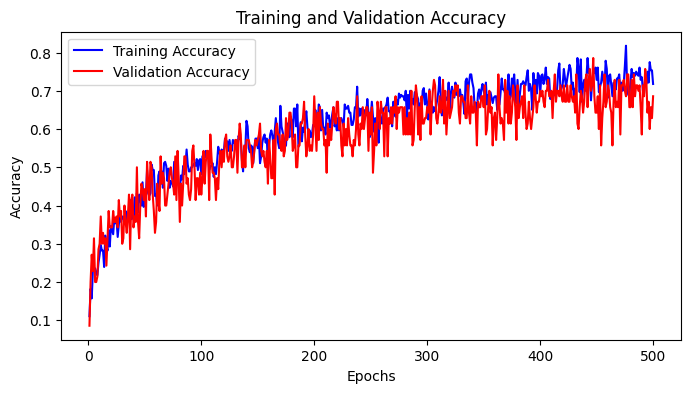

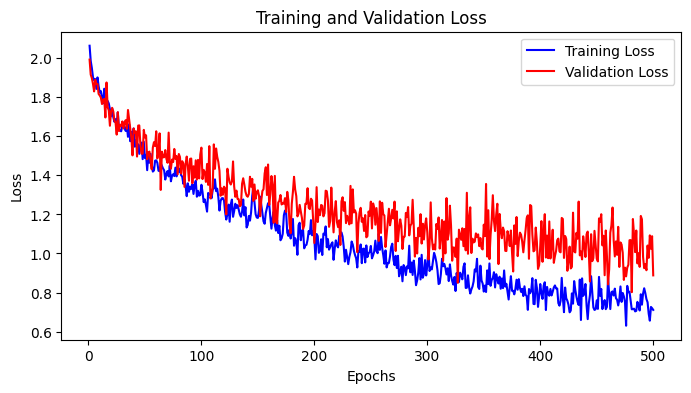

In [25]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Create the epochs range
epochs = range(1, len(accuracy) + 1)

# Plot accuracy
plt.figure(figsize=(8, 4))
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 4))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()